# WCS RiskGuard
## AI Fruad Detection Model

#### Start with the likely imports and reading the data

In [18]:
# add imports
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
test_transactions = pd.read_csv(r'datasets/test_transaction.csv')
test_identity = pd.read_csv(r'datasets/test_identity.csv')
train_transactions = pd.read_csv(r'datasets/train_transaction.csv')
train_identity = pd.read_csv(r'datasets/train_identity.csv')

# merge train and test datasets independently on 'TransactionID'
train_data = train_transactions.merge(train_identity, on='TransactionID', how='left')
test_data = test_transactions.merge(test_identity, on='TransactionID', how='left')

# delete unused objects to save memory
del test_transactions, train_transactions, train_identity, test_identity



#### Begin data visualization

In [13]:
print("Train Data Overview:")
display(train_data.head(7))
# train data pretty much looks the same

Train Data Overview:


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


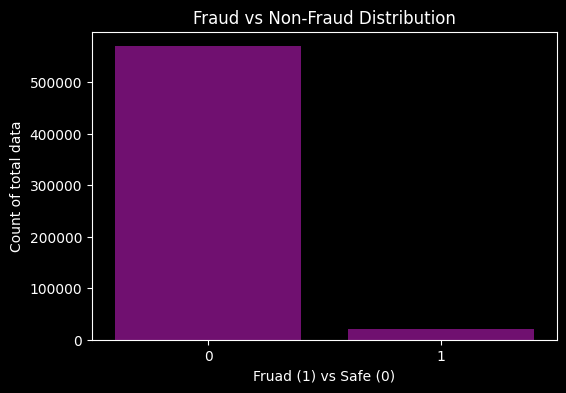

In [23]:
plt.style.use('dark_background')

# heatmap for the is fruad
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=train_data, color='purple')
plt.ylabel('Count of total data', color='white')
plt.xlabel('Fruad (1) vs Safe (0)', color='white')
plt.title("Fraud vs Non-Fraud Distribution", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

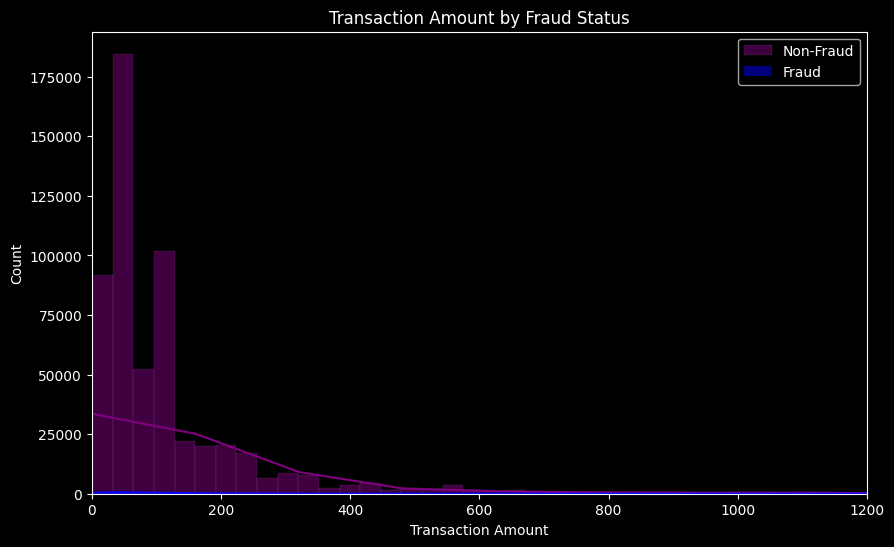

In [ ]:
# Transaction Amount Analysis
plt.figure(figsize=(10, 6))
sns.histplot(train_data[train_data['isFraud'] == 0]['TransactionAmt'], bins=1000, color='purple', label='Non-Fraud', kde=True)
sns.histplot(train_data[train_data['isFraud'] == 1]['TransactionAmt'], bins=1000, color='blue', label='Fraud', kde=True)
plt.title("Transaction Amount by Fraud Status", color='white')
plt.xlabel("Transaction Amount", color='white')
plt.xlim(0,1200)
plt.legend()
plt.show()

#FIXME Make it easier to see fruad data